# Random Forest Classification

In this exercise we will be tuning the RandomForest hyperparameters

Satrt by Importing useful libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

Reading the data which is included in the 'data_banknote_authentication.csv' file

In [4]:
df = pd.read_csv(r"E:\GUC\sem 10\(NETW 1013) Machine Learning\labs\lab 4\data_banknote_authentication.csv")
df.head(10)

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


Diving the data into features and labels (X and y)

In [5]:
X = df.drop('Class',axis=1)
y = df['Class']

Splitting the data into train and test parts

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Use the RandomForest model with a GridSearch to optimize 'n_estimators', 'max_features' and 'criterion' parameters

In [17]:
param_grid = {
    'n_estimators': np.arange(1,10),  # Number of trees in the forest
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for best split
    'criterion': ['gini', 'entropy']  # Function to measure split quality
}

rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy', verbose=1)

In [18]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=9, random_state=42)

In [19]:
preds=best_model.predict(X_test)

Evaluate the model by displaying a confusion matrix and a classification report 

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (E:\Anaconda\Lib\site-packages\sklearn\metrics\__init__.py)

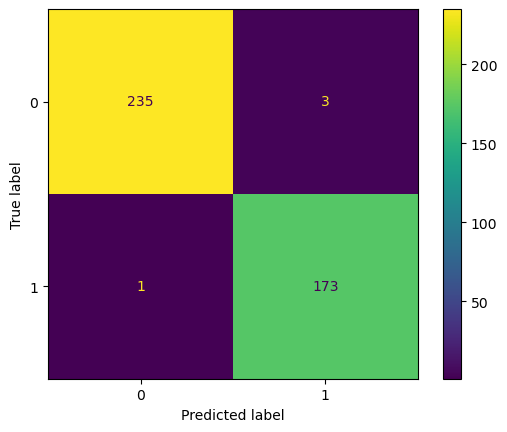

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_pred = best_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       238
           1       0.98      0.99      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

